<h2><center> <font color='black'> Graph Neural Networks (Part - I)</font></center></h3>

================================================================================================================


+ **Graph Neural Networks**
  1. Graph Convolutional Network (GCN)<br>
      1.1 Intuition and Maths behind Graph Convolutional Network (GCN)<br>
      1.2 Usecase: Node Classification with Graph Convolutional Network (GCN)<br>

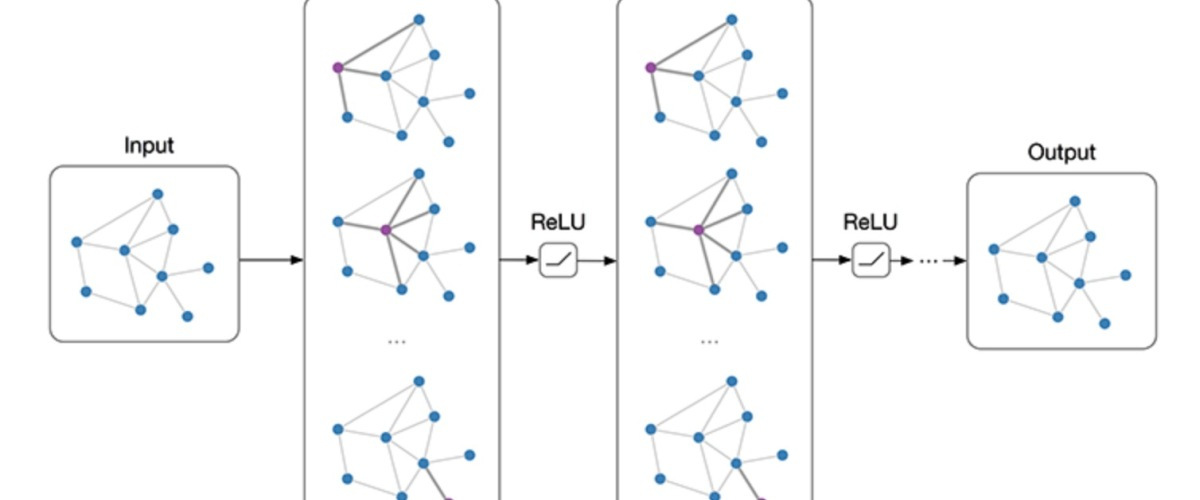

In [ ]:
from IPython.display import Image
#Image("gnn.jpg")

# Graph Neural Networks (GNN):
Graph Neural Networks (GNNs) are a class of deep learning methods designed to perform inference on data described by graphs. GNNs are neural networks that can be directly applied to graphs, and provide an easy way to do node-level, edge-level, and graph-level prediction tasks. A typical application of GNN is node classification. Essentially, every node in the graph is associated with a label, and we want to predict the label of the nodes without ground-truth.
# 1. Intuition and Maths behind Graph Convolutional Network (GCN): 
GCN is a type of convolutional neural network that can work directly on graphs and take advantage of their structural information.<br>


Reference: https://www.topbots.com/graph-convolutional-networks/

Example of 2-layer GCN: The output of the first layer is the input of the second layer. Again, note that the neural network in GCN is simply a fully connected layer.

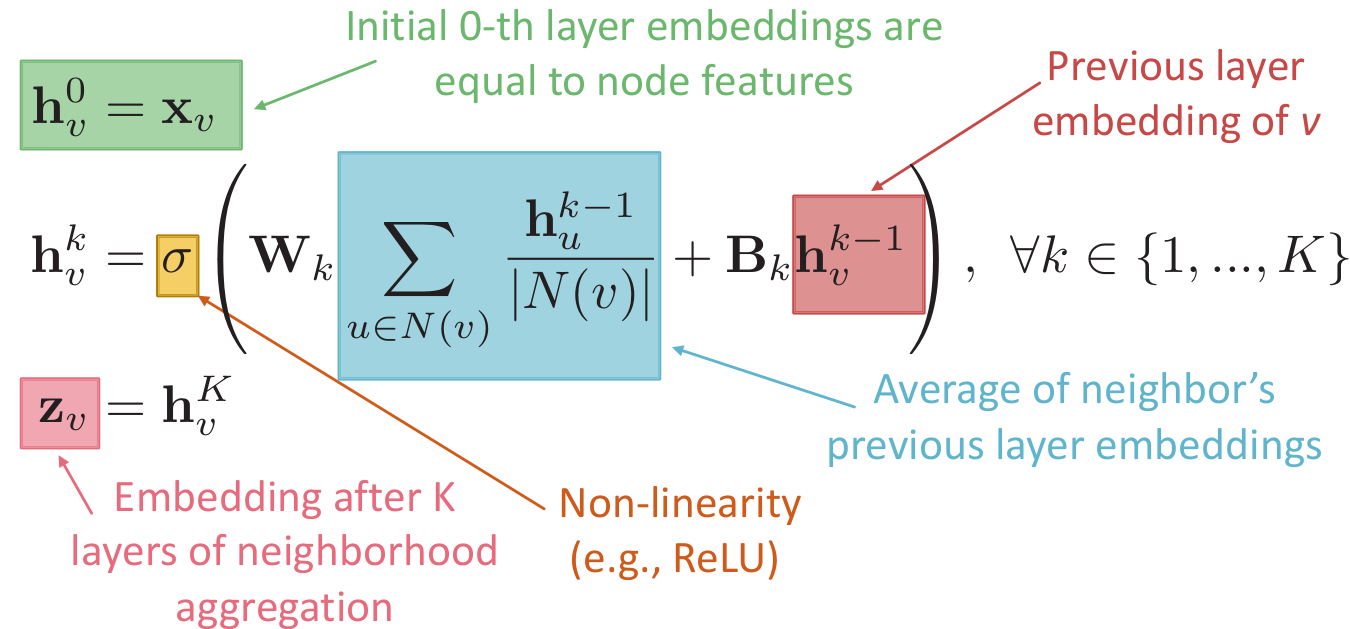

In [ ]:
from IPython.display import Image
#Image("gcn__hidden_layer.png")

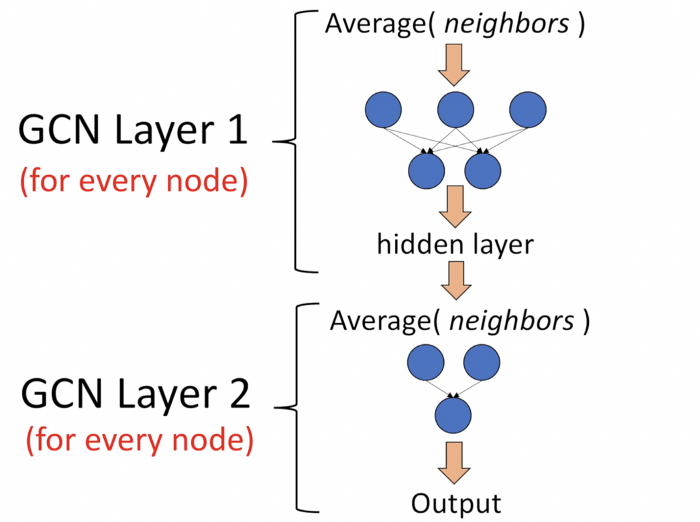

In [ ]:
from IPython.display import Image
#Image("gcn1.png")

From the graph G, we have an adjacency matrix A and a Degree matrix D. We also have feature matrix X.

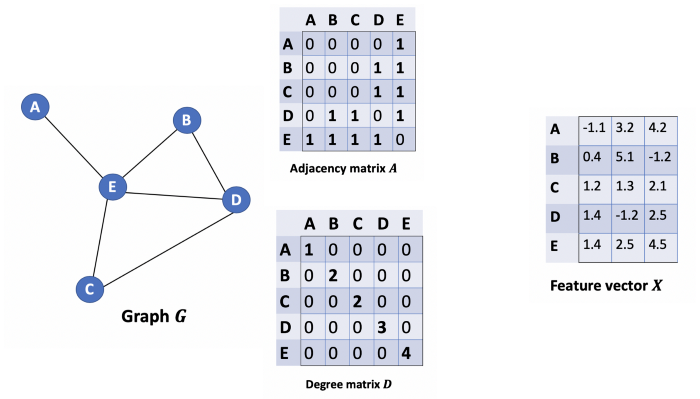

In [ ]:
#Image("gcn2.png")

How can we get all the feature values from neighbors for each node? The solution lies in the multiplication of A and X.

Take a look at the first row of the adjacency matrix, we see that node A has a connection to E. The first row of the resulting matrix is the feature vector of E, which A connects to (Figure below). Similarly, the second row of the resulting matrix is the sum of feature vectors of D and E. By doing this, we can get the sum of all neighbors’ vectors.

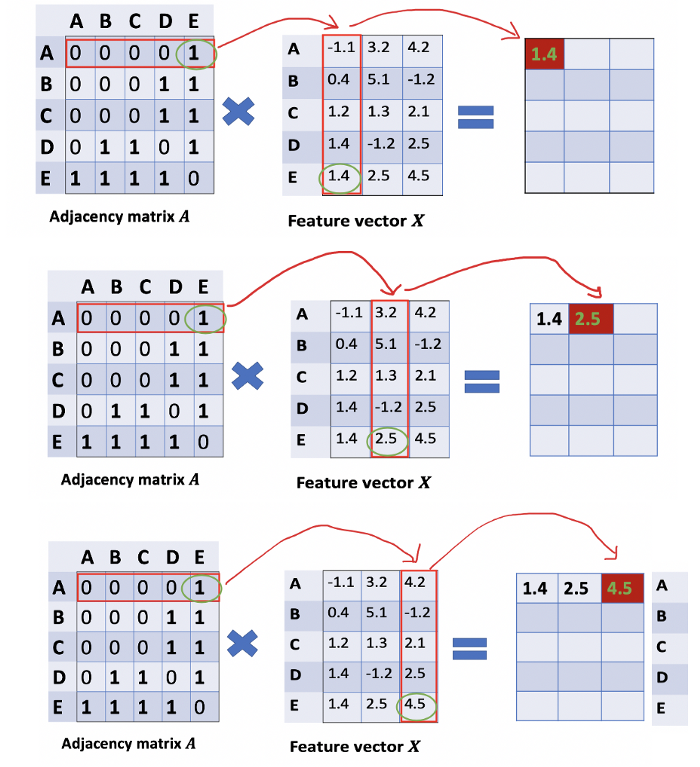

In [ ]:
#Image("gcn3.png")

There are still some things that need to improve here.
1. We miss the feature of the node itself. For example, the first row of the result matrix should contain features of node A too.
2. Instead of sum() function, we need to take the average, or even better, the weighted average of neighbors’ feature vectors. Why don’t we use the sum() function? The reason is that when using the sum() function, high-degree nodes are likely to have huge v vectors, while low-degree nodes tend to get small aggregate vectors, which may later cause exploding or vanishing gradients (e.g., when using sigmoid). Besides, Neural networks seem to be sensitive to the scale of input data. Thus, we need to normalize these vectors to get rid of the potential issues.<br>

In Problem (1), we can fix by adding an Identity matrix I to A to get a new adjacency matrix Ã.

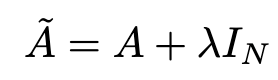

In [ ]:
#Image("gcn11.png")

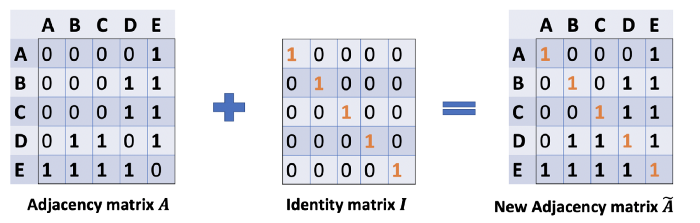

In [ ]:
#Image("gcn4.png")

Problem (2): For matrix scaling, we usually multiply the matrix by a diagonal matrix. In this case, we want to take the average of the sum feature, or mathematically, to scale the sum vector matrix ÃX according to the node degrees. The gut feeling tells us that our diagonal matrix used to scale here is something related to the Degree matrix D̃ (Why D̃, not D? Because we’re considering Degree matrix D̃ of new adjacency matrix Ã, not A anymore).

The problem now becomes how we want to scale/normalize the sum vectors? In other words:

How we pass the information from neighbors to a specific node?

We would start with our old friend average. In this case, D̃ inverse (i.e., D̃^{-1}) comes into play. Basically, each element in D̃ inverse is the reciprocal of its corresponding term of the diagonal matrix D.

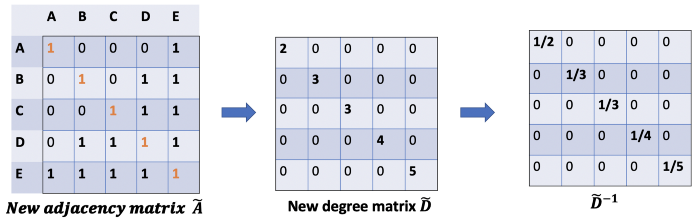

In [ ]:
#Image("gcn5.png")

For example, node A has a degree of 2, so we multiple the sum vectors of node A by 1/2, while node E has a degree of 5, we should multiple the sum vector of E by 1/5, and so on.

Thus, by taking the multiplication of D̃ inverse and X, we can take the average of all neighbors’ feature vectors (including itself).

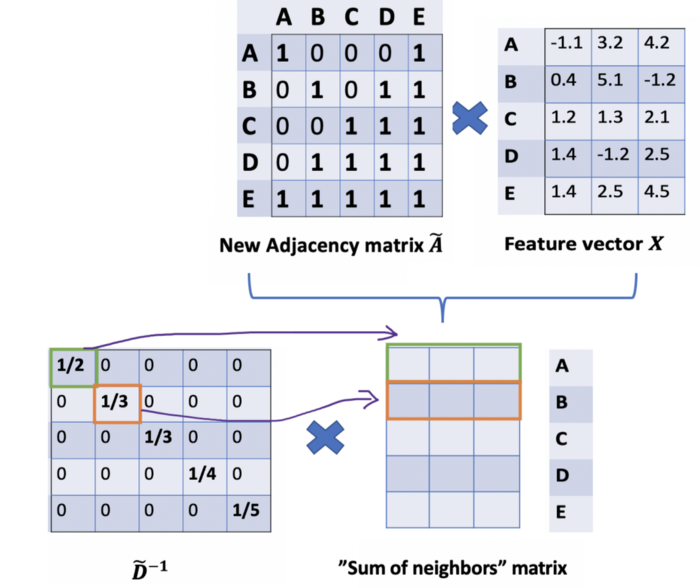

In [ ]:
#Image("gcn6.png")

The new scaler gives us the “weighted” average. What are we doing here is to put more weights on the nodes that have low-degree and reduce the impact of high-degree nodes. The idea of this weighted average is that we assume low-degree nodes would have bigger impacts on their neighbors, whereas high-degree nodes generate lower impacts as they scatter their influence at too many neighbors.

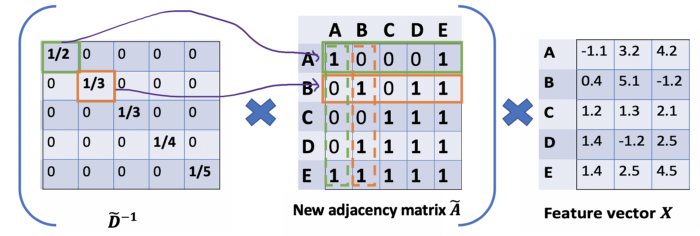

In [ ]:
#Image("gcn7.png")

We’re just scaling by rows, but ignoring their corresponding columns (dash boxes)


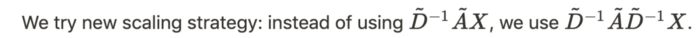

In [ ]:
#Image("gcn12.png")

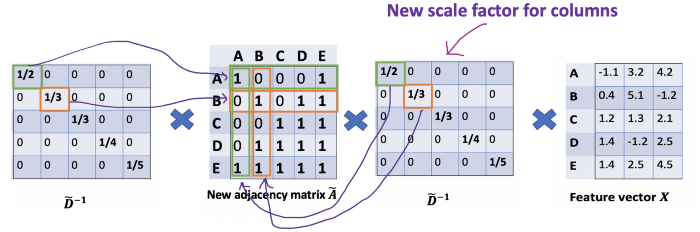

In [ ]:
#Image("gcn8.png")

Because we normalize twice, we change “-1” to “-1/2”


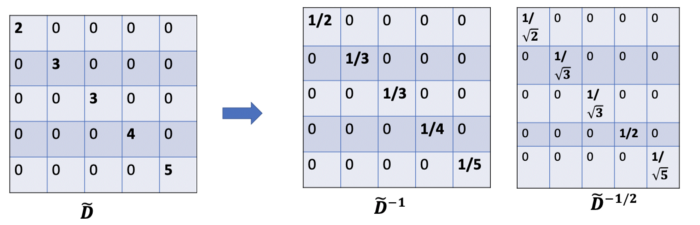

In [ ]:
#Image("gcn9.png")

Putting everything together:

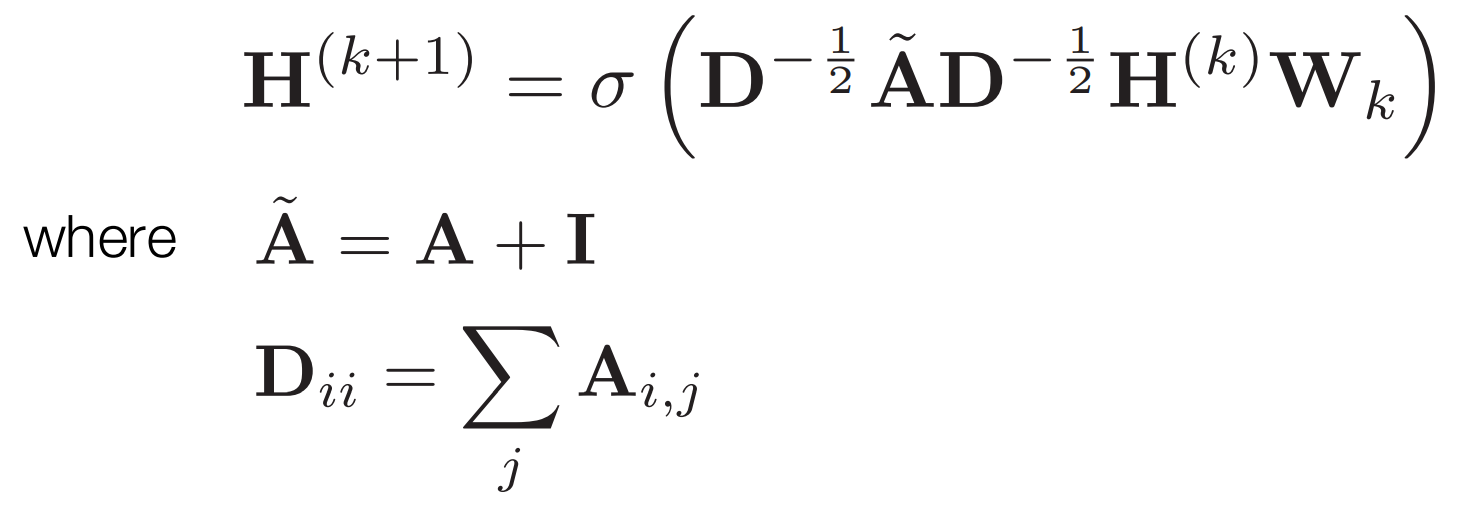

In [ ]:
#Image("equation.png")

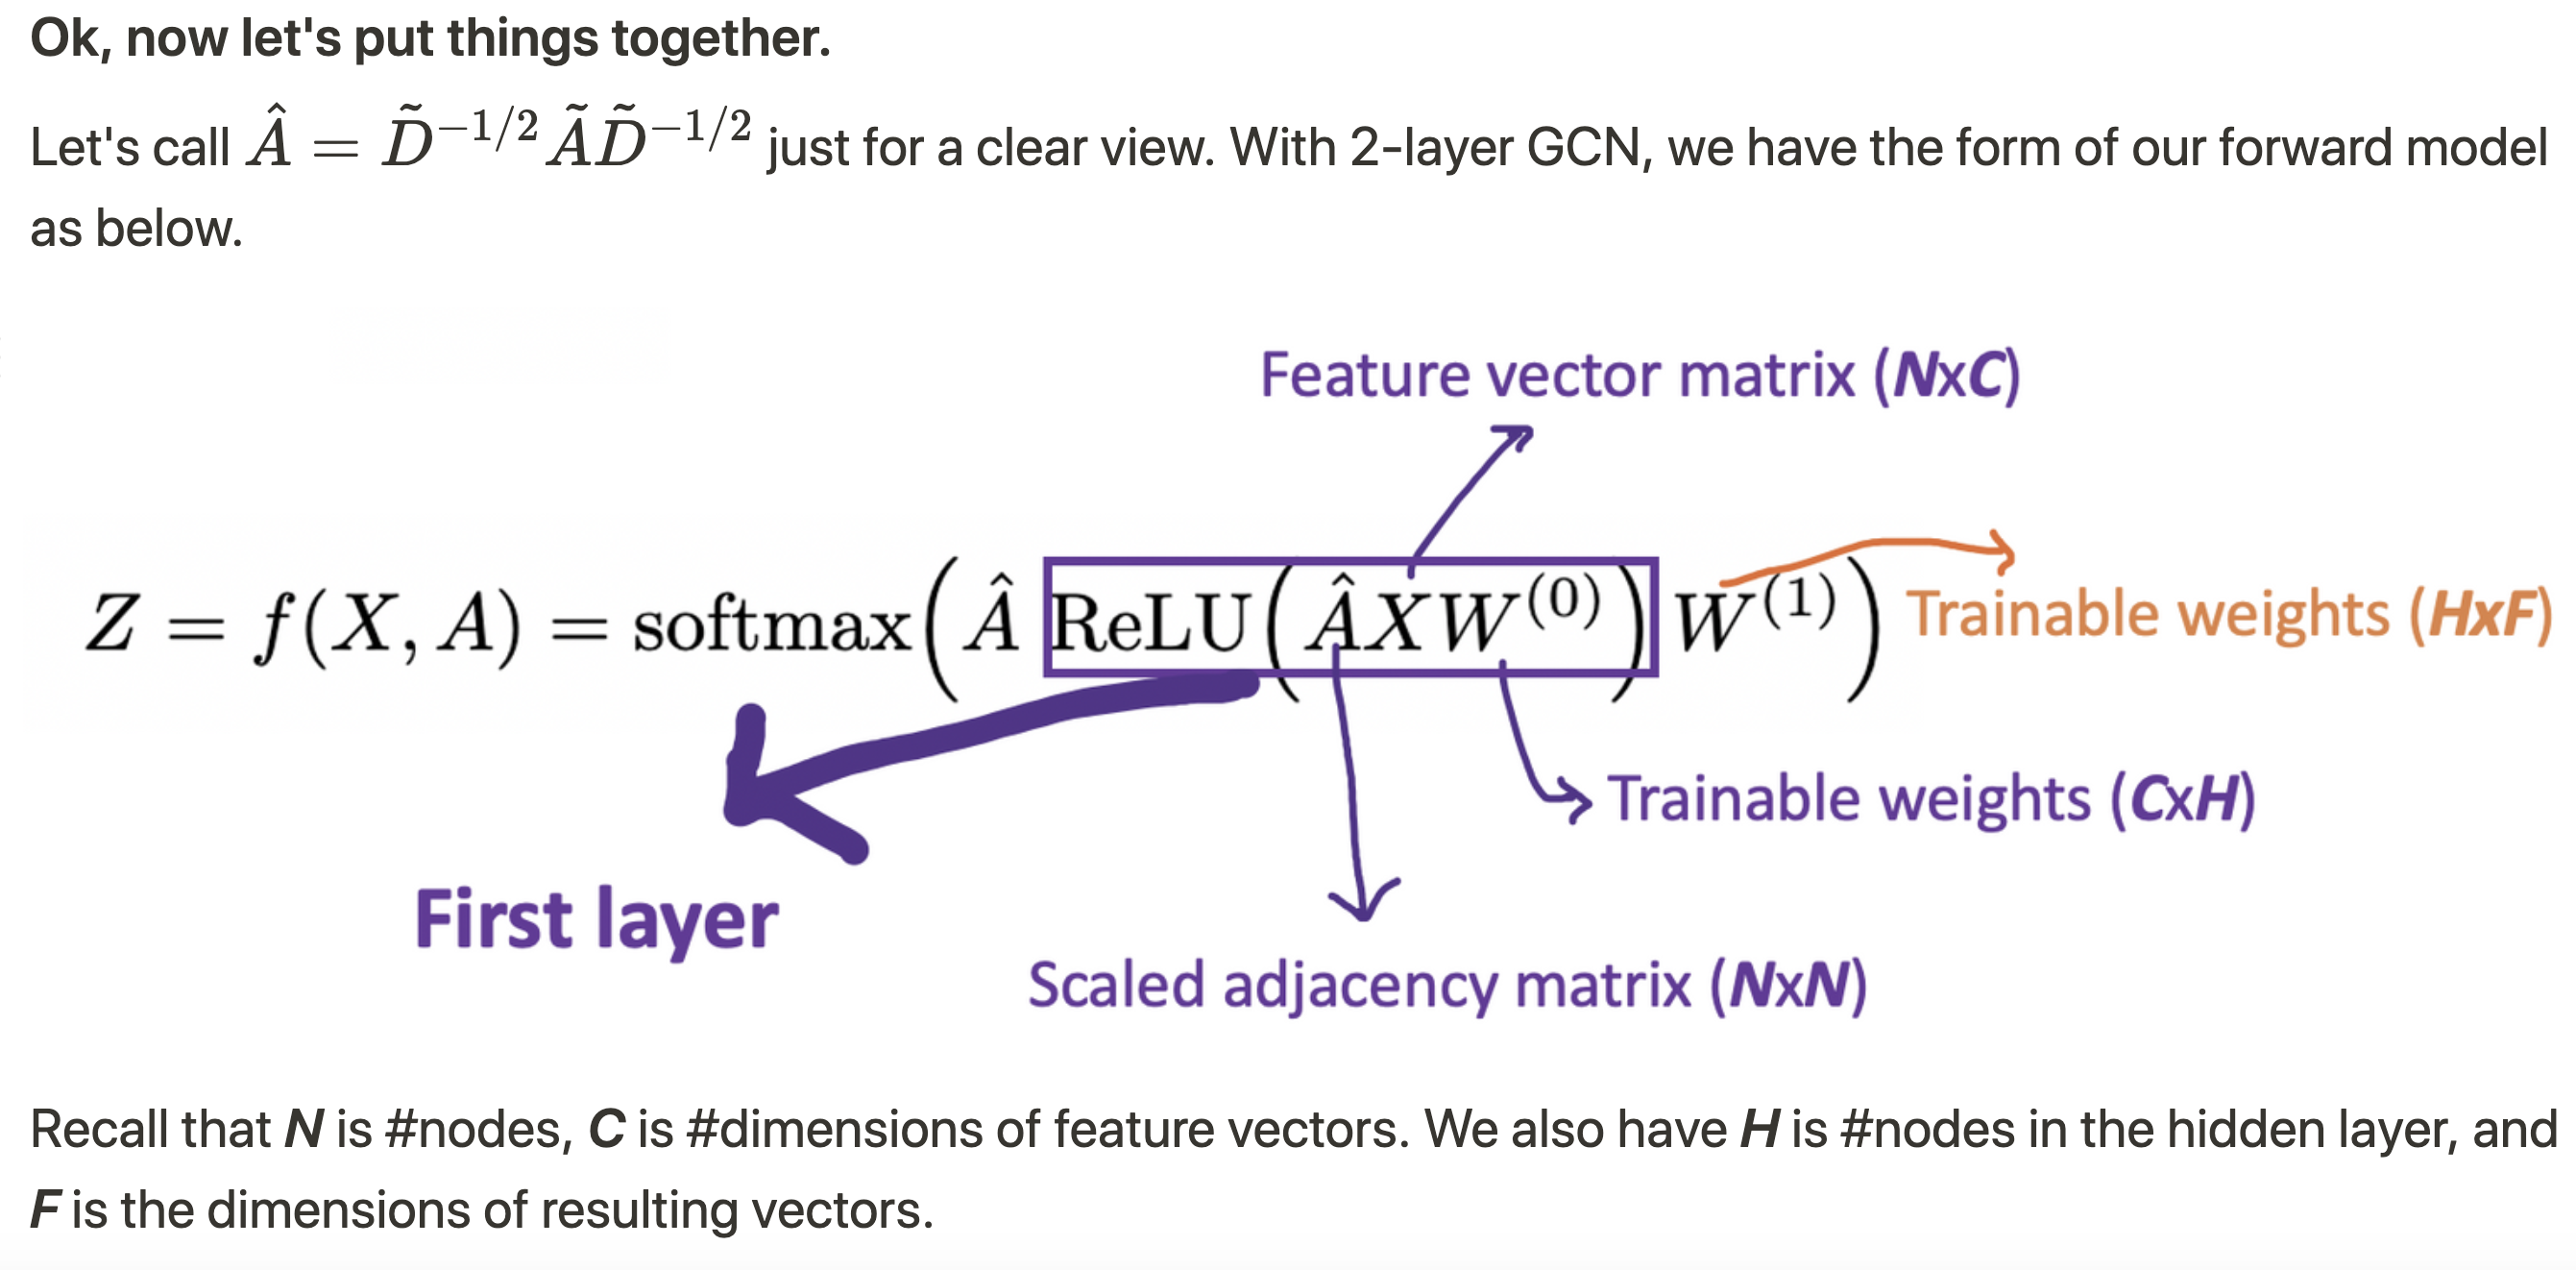

In [ ]:
#Image("gcn_unroll.png")

Same equation of hidden layer as discussed in the GNN lecture:

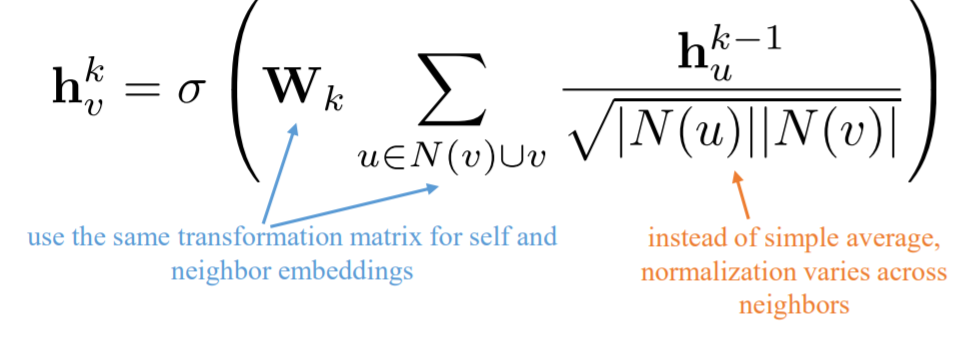

In [ ]:
#Image("gcn_hidden_layer.png")

# 2. UseCase: Node classification with Graph Convolutional Network (GCN)
Reference: https://stellargraph.readthedocs.io/en/stable/README.html#introduction

Tensorflow Links
1. Official documentation - https://www.tensorflow.org/tutorials
2. Tutorial For Beginners Video - https://www.youtube.com/watch?v=QPDsEtUK_D4&ab_channel=Simplilearn
3. Tensorflow Playground (interactive visualization of neural networks): 
http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.90110&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In this notebook, we’ll be training a model to predict the class or label of a node, commonly known as node classification. We will also use the resulting model to compute vector embeddings for each node.

There’s two necessary parts to be able to do this task:

1. a graph: this notebook uses the Cora dataset from https://linqs.soe.ucsc.edu/data. The dataset consists of academic publications as the nodes and the citations between them as the links: if publication A cites publication B, then the graph has an edge from A to B. The nodes are classified into one of seven subjects, and our model will learn to predict this subject.

2. an algorithm: this notebook uses a Graph Convolution Network (GCN). The core of the GCN neural network model is a “graph convolution” layer. This layer is similar to a conventional dense layer, augmented by the graph adjacency matrix to use information about a node’s connections.

## Libraries needed

**We need following libraries: tensorflow, stellargraph. TSNE**

StellarGraph is a Python 3 library and we recommend using Python version 3.6. The required Python version can be downloaded and installed from python.org. Alternatively, use the Anaconda Python environment, available from anaconda.com.

The StellarGraph library can be installed from PyPI, from Anaconda Cloud, or directly from GitHub.

1. Install StellarGraph using PyPI:
To install StellarGraph library from PyPI using pip, execute the following command:

**pip install stellargraph**

2. Install StellarGraph in Anaconda Python:<br>
The StellarGraph library is available an Anaconda Cloud and can be installed in Anaconda Python using the command line conda tool, execute the following command:

**conda install -c stellargraph stellargraph**

3. Install StellarGraph from GitHub source:
First, clone the StellarGraph repository using git:

git clone https://github.com/stellargraph/stellargraph.git
Then, cd to the StellarGraph folder, and install the library by executing the following commands:

cd stellargraph
**pip install .**

In [ ]:
import pandas as pd
import os

import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from tensorflow.keras.callbacks import EarlyStopping

# 2.1. Data Preparation

## Loading the Cora network:
We can retrieve a StellarGraph graph object holding this Cora dataset using the Cora loader from the datasets submodule. It also provides us with the ground-truth node subject classes.<br>
(Note: Cora is a citation network, which is a directed graph, but, like most users of this graph, we ignore the edge direction and treat it as undirected.)

## Loading Dataset:

In [ ]:
dataset = sg.datasets.Cora()
display(HTML(dataset.description))
G, node_subjects = dataset.load()

The info method can help us verify that our loaded graph matches the description:

In [ ]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 2708, Edges: 5429

 Node types:
  paper: [2708]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5429]
        Weights: all 1 (default)
        Features: none


We aim to train a graph-ML model that will predict the “subject” attribute on the nodes. These subjects are one of 7 categories, with some categories more common than others:

In [ ]:
node_subjects.value_counts().to_frame()

,subject
Neural_Networks,818
Probabilistic_Methods,426
Genetic_Algorithms,418
Theory,351
Case_Based,298
Reinforcement_Learning,217
Rule_Learning,180


### Splitting the data


For machine learning we want to take a subset of the nodes for training, and use the rest for validation and testing. We’ll use scikit-learn’s train_test_split function to do this.

Here we’re taking 140 node labels for training, 500 for validation, and the rest for testing.

In [ ]:
train_subjects, test_subjects = model_selection.train_test_split(
    node_subjects, train_size=140, test_size=None, stratify=node_subjects
)
val_subjects, test_subjects = model_selection.train_test_split(
    test_subjects, train_size=500, test_size=None, stratify=test_subjects
)

Note using stratified sampling gives the following counts:

In [ ]:
train_subjects.value_counts().to_frame()

,subject
Neural_Networks,42
Probabilistic_Methods,22
Genetic_Algorithms,22
Theory,18
Case_Based,16
Reinforcement_Learning,11
Rule_Learning,9


The training set has class imbalance that might need to be compensated, e.g., via using a weighted cross-entropy loss in model training, with class weights inversely proportional to class support. However, we will ignore the class imbalance in this example, for simplicity.

### Converting to numeric arrays
For our categorical target, we will use one-hot vectors that will be compared against the model’s soft-max output. To do this conversion we can use the LabelBinarizer transform from scikit-learn. Another option would be the pandas.get_dummies function, but the scikit-learn transform allows us to do the inverse transform easily later in the notebook, to interpret the predictions.

In [ ]:
target_encoding = preprocessing.LabelBinarizer()

train_targets = target_encoding.fit_transform(train_subjects)
val_targets = target_encoding.transform(val_subjects)
test_targets = target_encoding.transform(test_subjects)

# 2.2. Creating the GCN layers
A machine learning model in StellarGraph consists of a pair of items:

1. the layers themselves, such as graph convolution, dropout and even conventional dense layers

2. a data generator to convert the core graph structure and node features into a format that can be fed into the Keras model for training or prediction

GCN is a full-batch model and we’re doing node classification here, which means the FullBatchNodeGenerator class is the appropriate generator for our task. StellarGraph has many generators in order to support all its many models and tasks.

Specifying the method='gcn' argument to the FullBatchNodeGenerator means it will yield data appropriate for the GCN algorithm specifically, by using the normalized graph Laplacian matrix to capture the graph structure.

In [ ]:
generator = FullBatchNodeGenerator(G, method="gcn")

Using GCN (local pooling) filters...


A generator just encodes the information required to produce the model inputs. Calling the flow method with a set of nodes and their true labels produces an object that can be used to train the model, on those nodes and labels that were specified. We created a training set above, so that’s what we’re going to use here.

In [ ]:
train_gen = generator.flow(train_subjects.index, train_targets)

Now we can specify our machine learning model by building a stack of layers. We can use StellarGraph’s GCN class, which packages up the creation of this stack of graph convolution and dropout layers. We can specify a few parameters to control this:

1. layer_sizes: the number of hidden GCN layers and their sizes. In this case, two GCN layers with 16 units each.

2. activations: the activation to apply to each GCN layer’s output. In this case, RelU for both layers.

3. dropout: the rate of dropout for the input of each GCN layer. In this case, 50%.

In [ ]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=generator, dropout=0.5
)

To create a Keras model we now expose the input and output tensors of the GCN model for node prediction, via the GCN.in_out_tensors method:

In [ ]:
x_inp, x_out = gcn.in_out_tensors()

x_out

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

<tf.Tensor 'gather_indices/GatherV2:0' shape=(1, None, 16) dtype=float32>

The x_out value is a TensorFlow tensor that holds a 16-dimensional vector for the nodes requested when training or predicting. The actual predictions of each node’s class/subject needs to be computed from this vector. StellarGraph is built using Keras functionality, so this can be done with a standard Keras functionality: an additional dense layer (with one unit per class) using a softmax activation. This activation function ensures that the final outputs for each input node will be a vector of “probabilities”, where every value is between 0 and 1, and the whole vector sums to 1. The predicted class is the element with the highest value.

In [ ]:
predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

# 2.3. Training and evaluating
## Training the model
Now let’s create the actual Keras model with the input tensors x_inp and output tensors being the predictions predictions from the final dense layer. Our task is a categorical prediction task, so a categorical cross-entropy loss function is appropriate. Even though we’re doing graph ML with StellarGraph, we’re still working with conventional Keras prediction values, so we can use the loss function from Keras directly.

In [ ]:
model = Model(inputs=x_inp, outputs=predictions)
model.compile(
    optimizer=optimizers.Adam(lr=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

As we’re training the model, we’ll want to also keep track of its generalisation performance on the validation set, which means creating another data generator, using our FullBatchNodeGenerator we created above.

In [ ]:
val_gen = generator.flow(val_subjects.index, val_targets)

We can directly use the EarlyStopping functionality offered by Keras to stop training if the validation accuracy stops improving.

In [ ]:
es_callback = EarlyStopping(monitor="val_acc", patience=50, restore_best_weights=True)

We’ve now set up our model layers, our training data, our validation data and even our training callbacks, so we can now train the model using the model’s fit method. Like most things in this section, this is all built into Keras.

In [ ]:
history = model.fit(
    train_gen,
    epochs=200,
    validation_data=val_gen,
    verbose=2,
    shuffle=False,  # this should be False, since shuffling data means shuffling the whole graph
    callbacks=[es_callback],
)

Epoch 1/200
1/1 - 1s - loss: 1.9482 - acc: 0.1214 - val_loss: 1.9162 - val_acc: 0.3160
Epoch 2/200
1/1 - 0s - loss: 1.9094 - acc: 0.3071 - val_loss: 1.8760 - val_acc: 0.3080
Epoch 3/200
1/1 - 0s - loss: 1.8741 - acc: 0.3357 - val_loss: 1.8261 - val_acc: 0.3000
Epoch 4/200
1/1 - 0s - loss: 1.7943 - acc: 0.3357 - val_loss: 1.7711 - val_acc: 0.3020
Epoch 5/200
1/1 - 0s - loss: 1.7449 - acc: 0.3643 - val_loss: 1.7186 - val_acc: 0.3020
Epoch 6/200
1/1 - 0s - loss: 1.6566 - acc: 0.3214 - val_loss: 1.6671 - val_acc: 0.3220
Epoch 7/200
1/1 - 0s - loss: 1.5721 - acc: 0.3714 - val_loss: 1.6163 - val_acc: 0.3840
Epoch 8/200
1/1 - 0s - loss: 1.5107 - acc: 0.4214 - val_loss: 1.5678 - val_acc: 0.4220
Epoch 9/200
1/1 - 0s - loss: 1.4402 - acc: 0.4500 - val_loss: 1.5202 - val_acc: 0.4380
Epoch 10/200
1/1 - 0s - loss: 1.3910 - acc: 0.5000 - val_loss: 1.4697 - val_acc: 0.4580
Epoch 11/200
1/1 - 0s - loss: 1.3129 - acc: 0.5429 - val_loss: 1.4137 - val_acc: 0.4940
Epoch 12/200
1/1 - 0s - loss: 1.2416 - ac

Epoch 95/200
1/1 - 0s - loss: 0.0224 - acc: 0.9929 - val_loss: 1.2038 - val_acc: 0.7660
Epoch 96/200
1/1 - 0s - loss: 0.0236 - acc: 0.9929 - val_loss: 1.2082 - val_acc: 0.7700
Epoch 97/200
1/1 - 0s - loss: 0.0422 - acc: 0.9857 - val_loss: 1.2122 - val_acc: 0.7720
Epoch 98/200
1/1 - 0s - loss: 0.0435 - acc: 0.9929 - val_loss: 1.2171 - val_acc: 0.7720
Epoch 99/200
1/1 - 0s - loss: 0.0274 - acc: 1.0000 - val_loss: 1.2234 - val_acc: 0.7720


Once we’ve trained the model, we can view the behaviour loss function and any other metrics using the plot_history function. In this case, we can see the loss and accuracy on both the training and validation sets.

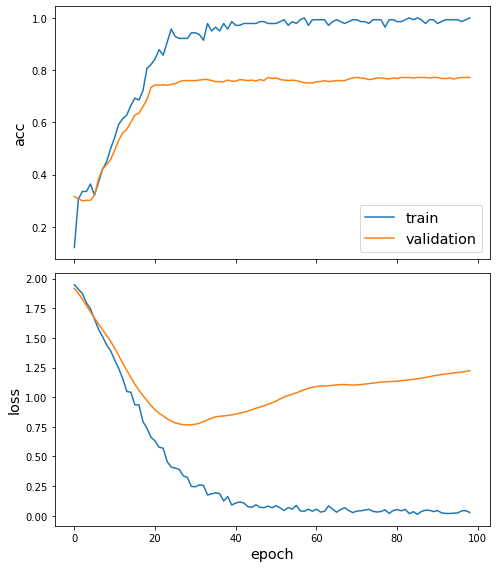

In [ ]:
sg.utils.plot_history(history)

As the final part of our evaluation, let’s check the model against the test set. We again create the data required for this using the flow method on our FullBatchNodeGenerator from above, and can use the model’s evaluate method to compute the metric values for the trained model.

As expected, the model performs similarly on the validation set during training and on the test set here.

In [ ]:
test_gen = generator.flow(test_subjects.index, test_targets)

In [ ]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 3ms/step - loss: 0.8334 - acc: 0.7935

Test Set Metrics:
	loss: 0.8334
	acc: 0.7935


### Making predictions with the model
Now let’s get the predictions for all nodes. You’re probably getting used to it by now, but we use our FullBatchNodeGenerator to create the input required and then use one of the model’s methods: predict. This time we don’t provide the labels to flow, and instead just the nodes, because we’re trying to predict these classes without knowing them.

These predictions will be the output of the softmax layer, so to get final categories we’ll use the inverse_transform method of our target attribute specification to turn these values back to the original categories.
Note that for full-batch methods the batch size is 1 and the predictions have shape (1,Nnodes,Nclasses) so we we remove the batch dimension to obtain predictions of shape (Nnodes,Nclasses) using the NumPy squeeze method.

In [ ]:
all_nodes = node_subjects.index
all_gen = generator.flow(all_nodes)
all_predictions = model.predict(all_gen)

Let’s have a look at a few predictions after training the model:



In [ ]:
node_predictions = target_encoding.inverse_transform(all_predictions.squeeze())

In [ ]:
df = pd.DataFrame({"Predicted": node_predictions, "True": node_subjects})
df.head(20)

,Predicted,True
31336,Neural_Networks,Neural_Networks
1061127,Theory,Rule_Learning
1106406,Reinforcement_Learning,Reinforcement_Learning
13195,Reinforcement_Learning,Reinforcement_Learning
37879,Probabilistic_Methods,Probabilistic_Methods
1126012,Probabilistic_Methods,Probabilistic_Methods
1107140,Reinforcement_Learning,Theory
1102850,Neural_Networks,Neural_Networks
31349,Neural_Networks,Neural_Networks
1106418,Theory,Theory


## Node embeddings
In addition to just predicting the node class, it can be useful to get a more detailed picture of what information the model has learnt about the nodes and their neighbourhoods. In this case, this means an embedding of the node (also called a “representation”) into a latent vector space that captures that information, and it comes in the form of either a look-up table mapping node to a vector of numbers, or a neural network that produces those vectors. For GCN, we’re going to be using the second option, using the last graph convolution layer of the GCN model (called x_out above), before we applied the prediction layer.

We can visualise these embeddings as points on a plot, colored by their true subject labels. If the model has learned useful information about the nodes based on their class, we expect to see nice clusters of papers in the node embedding space, with papers of the same subject belonging to the same cluster.

To create a model that computes node embeddings, we use the same input tensors (x_inp) as the prediction model above, and just swap the output tensor to the GCN one (x_out) instead of the prediction layer. These tensors are connected to the same layers and weights that we trained when training the predictions above, and so we’re only using this model to compute/”predict” the node embedding vectors. Similar to doing predictions for every node, we will compute embeddings for every node using the all_gen data.

In [ ]:
embedding_model = Model(inputs=x_inp, outputs=x_out)

In [ ]:
emb = embedding_model.predict(all_gen)
emb.shape

(1, 2708, 16)

The last GCN layer had output dimension 16, meaning each embedding consists of 16 numbers. Plotting this directly would require a 16 dimensional plot, which is hard for humans to visualise. Instead, we can first project these vectors down to just 2 numbers, making vectors of dimension 2 that can be plotted on a normal 2D scatter plot.

There are many tools for this dimensionality reduction task, many of which are offered by scikit-learn. Two of the more common ones are principal component analysis (PCA) (which is linear) and t-distributed Stochastic Neighbor Embedding (t-SNE or TSNE) (non-linear). t-SNE is slower but typically gives nicer results for plotting.

In [ ]:
transform = TSNE

Note that the embeddings from the GCN model have a batch dimension of 1 so we squeeze this to get a matrix of Nnodes×Nemb.

In [ ]:
X = emb.squeeze(0)
X.shape

(2708, 16)

We’ve thus prepared our high-dimension embeddings and chosen our dimension-reduction transform, so we now compute the reduced vectors, as two columns of the new values.

In [ ]:
trans = transform(n_components=2)
X_reduced = trans.fit_transform(X)
X_reduced.shape

(2708, 2)

The X_reduced values contains a pair of numbers for each node, in the same order as the node_subjects Series of ground-truth labels (because that’s how all_gen was created). This is enough to do a scatter plot of the nodes, with colors. We can let matplotlib compute the colors by mapping the subjects to integers 0, 1, …, 6, using Pandas’s support for categorical data.

Qualitatively, the plot shows good clustering, where nodes of a single colour are mostly grouped together.

[None,
 Text(0.5, 0, '$X_1$'),
 Text(0, 0.5, '$X_2$'),
 Text(0.5, 1.0, 'TSNE visualization of GCN embeddings for cora dataset')]

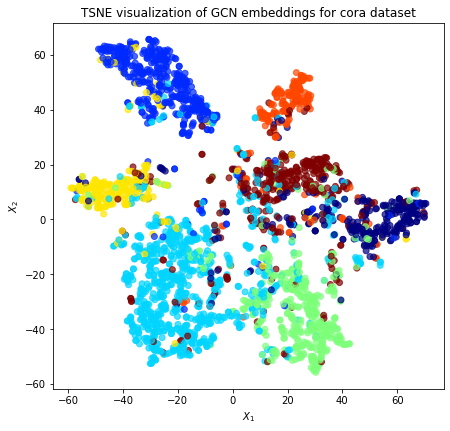

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=node_subjects.astype("category").cat.codes,
    cmap="jet",
    alpha=0.7,
)
ax.set(
    aspect="equal",
    xlabel="$X_1$",
    ylabel="$X_2$",
    title=f"{transform.__name__} visualization of GCN embeddings for cora dataset",
)

## Conclusion
This notebook gave an example using the GCN algorithm to predict the class of nodes. Specifically, the subject of an academic paper in the Cora dataset. Our model used:

1. the graph structure of the dataset, in the form of citation links between papers

2. the 1433-dimensional feature vectors associated with each paper

Once we trained a model for prediction, we could:

1. predict the classes of nodes

2. use the model’s weights to compute vector embeddings for nodes

This notebook ran through the following steps:

1. prepared the data using common data science libraries

2. built a TensorFlow Keras model and data generator with the StellarGraph library

3. trained and evaluated it using TensorFlow and other libraries